# PROJECT NLP DONE BY MAUZUM SHAMIL

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\twitter_training.csv")

In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.nunique()

2401                                                     12447
Borderlands                                                 32
Positive                                                     4
im getting on borderlands and i will murder you all ,    69490
dtype: int64

In [6]:
df.drop('2401',axis=1,inplace=True)

In [7]:
df.drop('Borderlands',axis=1,inplace=True)

In [8]:
df = df.rename(columns={'Positive':'class','im getting on borderlands and i will murder you all ,':'text'})

In [9]:
df.head()

,class,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [10]:
df.isna().sum()

class      0
text     686
dtype: int64

In [11]:
df1 = df[df['text'].isna()].index

In [12]:
df.drop(df1,axis=0,inplace=True)

In [13]:
df.isna().sum()

class    0
text     0
dtype: int64

In [14]:
df.reset_index(inplace=True)

In [15]:
df.drop('index',axis=1,inplace=True)

In [16]:
df.head(10)

,class,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
5,Positive,So I spent a few hours making something for fu...
6,Positive,So I spent a couple of hours doing something f...
7,Positive,So I spent a few hours doing something for fun...
8,Positive,So I spent a few hours making something for fu...
9,Positive,2010 So I spent a few hours making something f...


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['class']=le.fit_transform(df['class'])

In [18]:
df.head()

,class,text
0,3,I am coming to the borders and I will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [19]:
df = df.sample(frac=1)

In [20]:
df=df.reset_index()
df = df.drop('index',axis=1)

In [21]:
df.head()

,class,text
0,2,5 Broken bottle kills 2 a row. Generation II....
1,0,@teamsecret Dear Secret. You know that even yo...
2,2,A car rolled left of your parking lot or over ...
3,1,"fuck fortnite (yes, I rage)"
4,3,If I asked to vote what system would be best t...


In [22]:
df.shape

(73995, 2)

In [23]:
df.nunique()

class        4
text     69490
dtype: int64

In [24]:
df.describe()

,class
count,73995.000000
mean,1.628975
std,1.067535
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [25]:
df.dtypes

class     int32
text     object
dtype: object

# preprocessing the data

In [26]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [27]:
df['text'] = df['text'].apply(wordopt)

In [28]:
df.head()

,class,text
0,2,broken bottle kills a row generation ii
1,0,teamsecret dear secret you know that even yo...
2,2,a car rolled left of your parking lot or over ...
3,1,fuck fortnite yes i rage
4,3,if i asked to vote what system would be best t...


# data visualization 

In [29]:
%pip install wordcloud
from wordcloud  import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

<Axes: xlabel='class', ylabel='Count'>

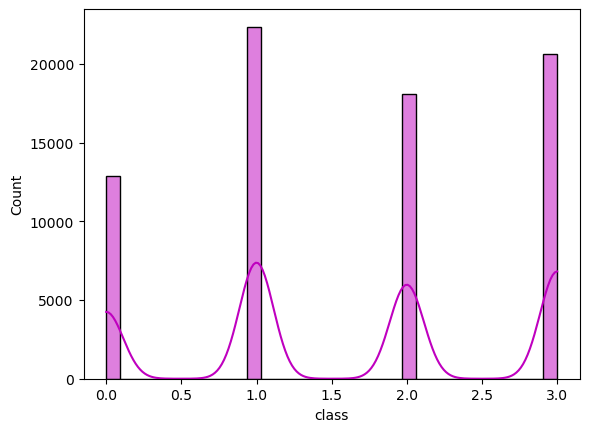

In [31]:
sns.histplot(df['class'],color='m',kde = True )

# splitting the data

In [32]:
x = df['text']
y = df['class']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(59196,) (14799,) (59196,) (14799,)


# vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()

In [36]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [37]:
print(xv_train)

  (0, 909)	0.4730137616355872
  (0, 10564)	0.7401772792653813
  (0, 21796)	0.3985369241045243
  (0, 3112)	0.26374968566418083
  (1, 15488)	0.2807411986836715
  (1, 9265)	0.28193017251929414
  (1, 24336)	0.2588168331908783
  (1, 22365)	0.18933902470779734
  (1, 25201)	0.4513688747557308
  (1, 12923)	0.7315261284919267
  (2, 11454)	0.07028719669141735
  (2, 15364)	0.06719919938181562
  (2, 8790)	0.1817537931836192
  (2, 16023)	0.20015693114856642
  (2, 10902)	0.07098184295859784
  (2, 21037)	0.2177463697373249
  (2, 13706)	0.09119368110477664
  (2, 12119)	0.22345811585685146
  (2, 7231)	0.11941015384748016
  (2, 1913)	0.14726949969165032
  (2, 4807)	0.15715709257577964
  (2, 12769)	0.10001923352031032
  (2, 8123)	0.2731136905134613
  (2, 814)	0.2060286387864405
  (2, 14596)	0.15787787203118614
  :	:
  (59194, 3074)	0.16216292252508854
  (59194, 15721)	0.14437478835650194
  (59194, 11911)	0.0926282159585373
  (59194, 24879)	0.15679803232161074
  (59194, 243)	0.17979280098262407
  (59194, 

In [38]:
xv_test.shape

(14799, 25517)

# model building

# Logestic regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [40]:
LR.fit(xv_train,y_train)
y_predLR = LR.predict(xv_test)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import precision_score

In [42]:
print("the acc score of LR is:", accuracy_score(y_test,y_predLR),)

the acc score of LR is: 0.769443881343334


# svm

In [43]:
from sklearn.svm import SVC 
SVM =SVC(kernel='rbf')


In [44]:
# SVM.fit(xv_train,y_train)
# y_predSVM =SVM.predict(xv_test)

# decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT =DecisionTreeClassifier()

In [46]:
DT.fit(xv_train,y_train)
y_predDT = DT.predict(xv_test)

In [47]:
print("the acc score is :", accuracy_score(y_test,y_predDT))

the acc score is : 0.7666734238799919


# random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [49]:
RF.fit(xv_train,y_train)
y_predRF = RF.predict(xv_test)

In [50]:
print(" the acc score of RF is:", accuracy_score(y_test,y_predRF))

 the acc score of RF is: 0.9205351712953578


# naive_bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [52]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [53]:
NB =[]
for i in [MNB,BNB]:
    i.fit(xv_train,y_train)
    NB.append(accuracy_score(y_test,i.predict(xv_test)))
print(NB)

[0.7170079059395905, 0.7090343942158254]


In [62]:
y_predMNB = MNB.predict(xv_test)

In [63]:
y_predBNB = BNB.predict(xv_test)

# boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ABC =AdaBoostClassifier()
GBC =GradientBoostingClassifier()

In [55]:
XG =[]
for i in [ABC,GBC]:
    i.fit(xv_train,y_train)
    XG.append(accuracy_score(y_test,i.predict(xv_test)))
print(XG)

[0.4842894790188526, 0.5512534630718292]


In [60]:
y_predABC = ABC.predict(xv_test)

In [61]:
y_predGBC = GBC.predict(xv_test)

In [56]:
%pip install xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [57]:
XGB.fit(xv_train,y_train)
y_predXGB = XGB.predict(xv_test)

In [58]:
print(" the acc score is of xg boost is :", accuracy_score(y_test,y_predXGB))

 the acc score is of xg boost is : 0.6670045273329279


# performance analysis

In [65]:
pt =[]

for i in [y_predLR,y_predDT,y_predRF,y_predXGB,y_predABC,y_predGBC,y_predMNB,y_predBNB]:
    pt.append(round(accuracy_score(y_test,i)*100,2))
print(pt)

[76.94, 76.67, 92.05, 66.7, 48.43, 55.13, 71.7, 70.9]


# conclusion

random forest have the highest accuracy model for the dataset with 92.05

In [75]:
df.head(25)

,class,text
0,2,broken bottle kills a row generation ii
1,0,teamsecret dear secret you know that even yo...
2,2,a car rolled left of your parking lot or over ...
3,1,fuck fortnite yes i rage
4,3,if i asked to vote what system would be best t...
5,3,interesting
6,2,red dead redemption the wildest in the west...
7,1,im sad on mobile u must update fortnite times...
8,3,when gta comes out im sure buys it right away...
9,1,they gave tyrodtaylor a total of and herber...


In [70]:
example = ["broken bottle kills a row generation "]
example_vectorized = vectorization.transform(example)
result = RF.predict(example_vectorized)
print(result)

if (result==0):
    print("positive")
elif result ==1:
    print("irrelevant")
elif result ==2:
    print("neutral")
else:
    print("not possitive")

[2]
not possituve


In [76]:
example = [" if ban by black stars player has occurred"]
example_vectorized = vectorization.transform(example)
result = RF.predict(example_vectorized)
print(result)

if (result==0):
    print("positive")
elif result ==1:
    print("irrelevant")
elif result ==2:
    print("neutral")
else:
    print("not possitive")

[0]
positive


In [ ]:
example = [" thank god for god"]
example_vectorized = vectorization.transform(example)
result = RF.predict(example_vectorized)
print(result)

if (result==0):
    print("positive")
elif result ==1:
    print("irrelevant")
elif result ==2:
    print("neutral")
else:
    print("not possitive")

In [ ]:
example = [" thank god for god"]
example_vectorized = vectorization.transform(example)
result = RF.predict(example_vectorized)
print(result)

if (result==0):
    print("positive")
elif result ==1:
    print("irrelevant")
elif result ==2:
    print("neutral")
else:
    print("not possitive")